# **Проект "Банки — Сегментация пользователей по потреблению"**


**Задача:**

Проанализировать клиентов регионального банка «Метанпром» и сегментировать клиентов в разрезе числа используемых ими продуктов

**Цель:**

Снижение оттока клиентов банка

**Описание данных:**

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.



**План работ:**

1.	Загрузка данных и библиотек, изучение общей информации о данных.


2.	Предобработка данных - проверка на пропуски, дубликаты, выбросы, а так же на соответствие представленных данных их типам.


3.	Исследовательский анализ данных.
    Построение визуализаций для изучения, как клиенты пользуются услугами (общие графики, матрицы корреляций)
    
    
4.	Сегментация:
    - сегментация клиентов в разрезе числа используемых продуктов и других признаков;
    - постоение графиков в разрезе признака по которому выполнена сегментация и сравнение распределений;
    - описание портретов выделенных сегментов.
    
    
5.	Статистическая проверка гипотез:
    - формулировка и проверка гипотезы № 1
    - формулировка и проверка гипотезы № 2


6.	Выводы и рекомендации по удержанию.
    Рекомендации представлены по каждому сегменту и имеют продуктовый характер.
   

# **Загрузка данных и библиотек, изучение общей информации о данных.**

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
from scipy import stats as st


In [2]:
try:
  data = pd.read_csv('bank_scrooge.csv')

except:
  path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F"
  data = pd.read_csv(path)


In [3]:
data.head(10)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


## **Вывод по разделу:**
Общая информация изучена. На первый взгляд типы данных в столбцах соответствуют представленным данным, в двух столбцах присутствуют пропуски, а так же названия столбцов необходимо привести к корректному виду. Займемся этим на следующем шаге.

# **Предобработка данных**

## *Приведем названия столбцов к хорошему стилю*

In [5]:
data.rename(columns = {'USERID':'user_id', 'EST_SALARY':'est_salary'}, inplace = True )

## *Проверим данные на явные дубликаты*

In [6]:
print('Количество дубликатов:', data.duplicated().sum())

Количество дубликатов: 0


## *Посмотрим на не явные дубликаты по значеним столбца 'user_id*

In [7]:
data[data.duplicated('user_id')]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1583,190253,726.0,Ярославль,М,49.0,0,NaN,1,1,1,177700.78,0
1837,210662,896.0,Рыбинск,Ж,37.0,0,NaN,2,0,0,90916.04,0
2138,131419,739.0,Рыбинск,Ж,37.0,3,1307941.65,3,0,0,103867.47,0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2302,220816,934.0,Рыбинск,Ж,74.0,5,1294285.39,3,1,0,95606.80,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0
9785,168998,895.0,Рыбинск,М,44.0,0,282653.53,3,0,0,255296.47,0
9819,140934,832.0,Рыбинск,Ж,NaN,3,385763.16,2,0,1,59651.35,0
9880,217412,886.0,Ярославль,Ж,35.0,3,1026172.14,2,1,0,53099.16,0


Таких строк оказалось достаточно много - 73, посмотрим на эти подробнее, что бы убедиться, что это действительно дубликаты.

In [8]:
# Сброс ограничений на количество выводимых строк
#pd.set_option('display.max_rows', None)
data[data.duplicated('user_id', keep=False)].sort_values(by = 'user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2597,226719,990.0,Ярославль,М,37.0,4,14648692.14,2,0,0,934412.61,1
8205,227795,840.0,Рыбинск,М,34.0,2,350768.03,1,1,0,102036.14,1
8497,227795,839.0,Ярославль,М,34.0,2,326593.14,2,1,0,103314.92,0
6457,228075,839.0,Рыбинск,М,39.0,5,507199.85,3,0,1,85195.80,0


Как оказалаось выявленные строки по идентичному значению user_id не являются дубликатами. В строках с одинаковым id попали разные клиенты из Ярославля и Рыбинска. Причина данной ситуации не известна, возможно при объединении в единую базу клиентов из разные филиалов была не проведена работа по унификации и присвоению новых уникальных номеров id для клиентов.
На данном этапе принято решение оставить всех выявленных клиентов в датафрейме в изначальном виде и дополнительно сообщить о найденной проблеме в техническую службу.

## *Проверим данные на присутствие пропусков*

In [9]:
data.isna().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

А так же рассчитаем их процент от общего числа строк в столбце.

In [10]:
data.isna().mean()

user_id          0.0000
score            0.0000
city             0.0000
gender           0.0000
age              0.0026
equity           0.0000
balance          0.2295
products         0.0000
credit_card      0.0000
last_activity    0.0000
est_salary       0.0000
churn            0.0000
dtype: float64

Пропуски присутствуют в столбцах age и balance, причём если в столбце age их меньше 1%, то в столбце balance их почти 23%.
Посмотрим на строки с пропусками подробнее.

In [11]:
#data[data.isna().any(axis=1)]
data[data['age'].isna()]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.0,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2444,221156,913.0,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0
3091,138660,836.0,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
4912,210674,834.0,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0
5470,218868,827.0,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0
5495,151662,884.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0
7236,210135,908.0,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0
7248,219343,920.0,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0
7345,184913,829.0,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0


Какой-то зависимости по другим признакам у пользователей с пропускам в столбце age не обнаружено. Данных для их заполнения у нас не имеется. Теоретически объем обнаруженных строк не большой и их можно удалить, но на данном этапе решено пока оставить данные без изменения.

Теперь посмотрим на строки с пропусками в столбце balance.
Возможно клиенты с пропусками это клиенты которые уже ушли в отток.

In [12]:
balance = data[data['balance'].isna()]

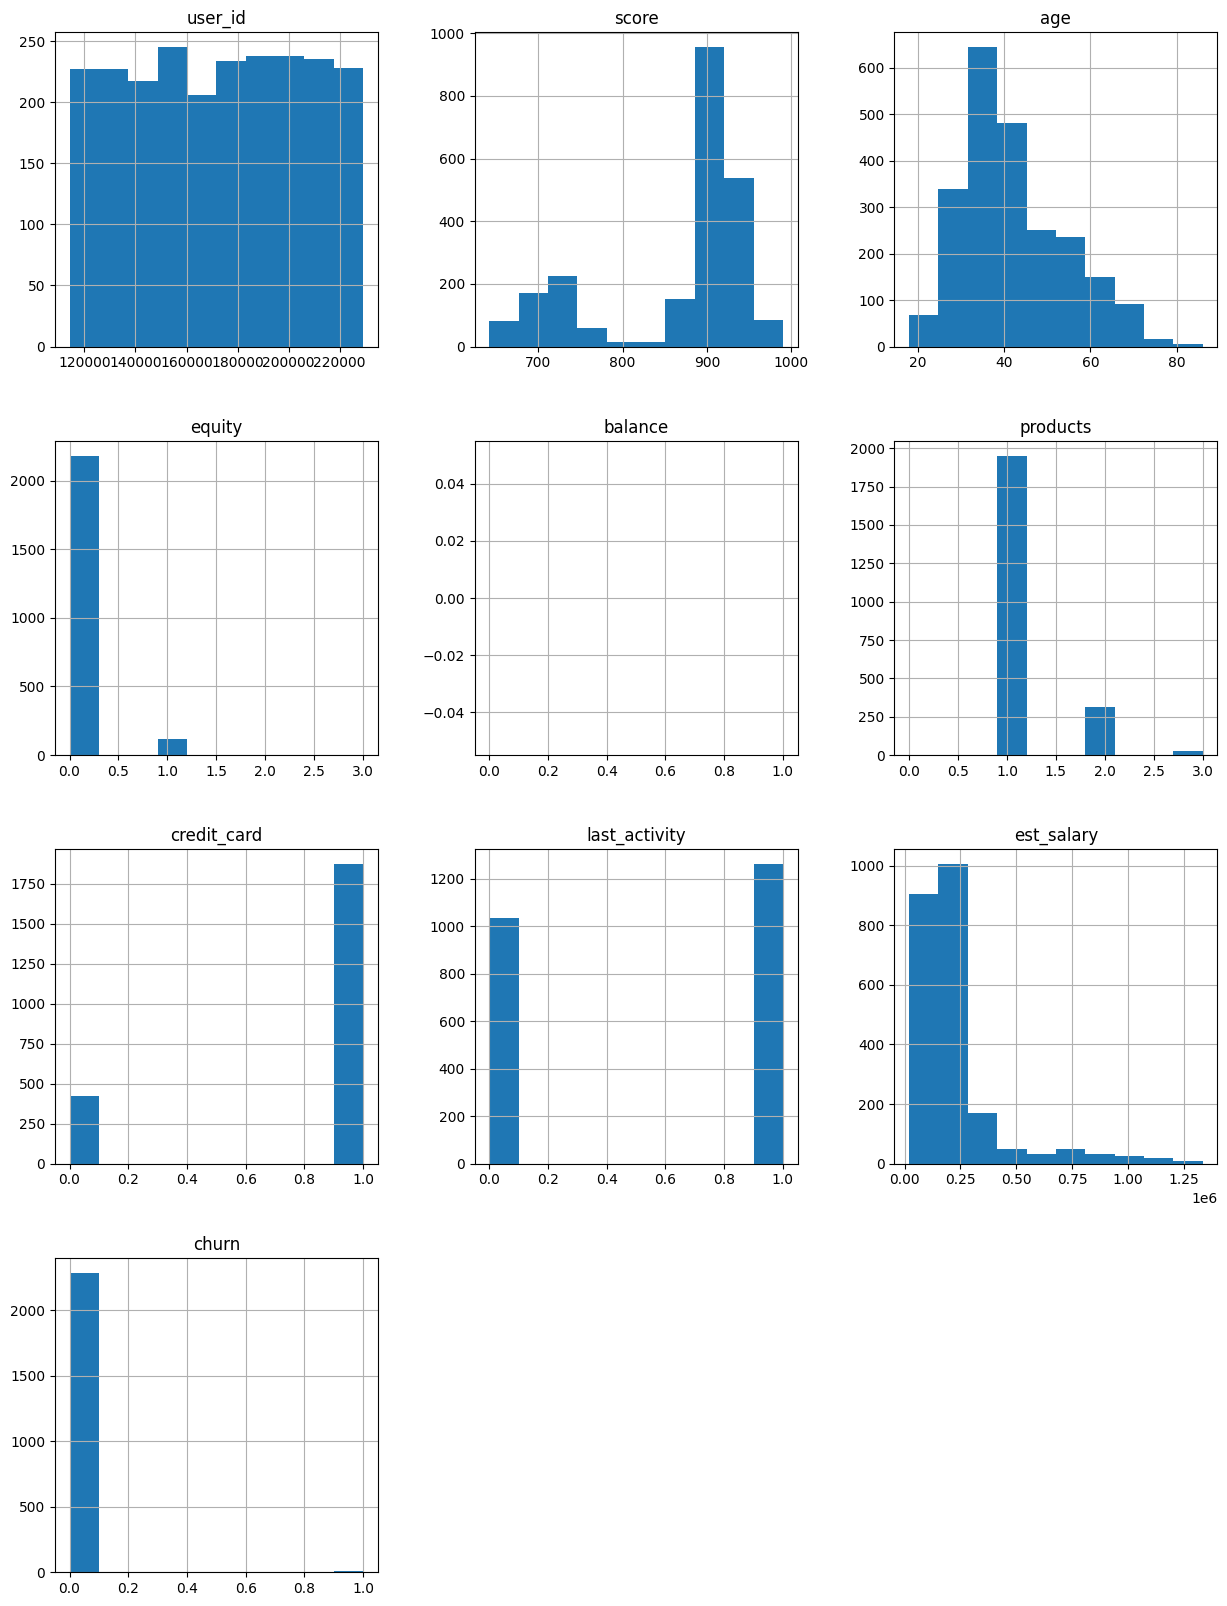

In [13]:
#Построим общую гистограмму для всех числовых столбцов таблицы
balance.hist(figsize=(15, 20))
plt.show ()

И отдельно посмотрим не числовые столбцы.

In [14]:
balance.groupby('city').agg(count_users = ('user_id', 'count'))

,count_users
city,
Ростов,235
Рыбинск,593
Ярославль,1467


In [15]:
balance.groupby('gender').agg(count_users = ('user_id', 'count'))

,count_users
gender,
Ж,1013
М,1282


Теория с отточными клиентами не подтвердилась, почти все клиенты являются действующими.
Так же не выявлены дополнительные критерии объединяющие данных клиентов ни при рассмотрении числовых столбцов ни при рассмотрении не числовых. На первый взгляд может показаться, что пропусков среди клиентов Ярославля больше чем среди клиентов из Ростова и Рыбинска, но и численность жителей Ярославля и Ростова, Рыбинска так же отличается в разы.

Таким оразом медианным значением по какому-то определенному критерию пропуски заполнить не получится и дополнительных данных для самостоятельного заполнения пропущенных значений не имется. Так же и заглушку в столбце balance решено на данном этапе не ставить, возможно предётся вернуться к данному вопросу на этапе ИАД.

## *Проверим данные на наличие аномальных значений*

Осуществим быстрый просмотр данных во всех столбцах датафрейма.

In [16]:
column_list = list(data)

for column_name in column_list:
      print(column_name)
      print(data[column_name].unique())
      print('\n')

user_id
[183012 146556 120722 ... 115639 148700  96267]


score
[ 850.  861.  892.  866.  730.  856.  807.  825.  923.  906.  927.  921.
  845.  837.  815.  731.  829.  793.  876.  922.  772.  896.  871.  732.
  898.  806.  766.  776.  868.  946.  828.  786.  944.  863.  822.  794.
  924.  811.  814.  956.  935.  826.  849.  901.  893.  792.  888.  831.
  748.  820.  860.  914.  930.  948.  789.  737.  812.  933.  809.  749.
  873.  859.  950.  937.  835.  768.  767.  785.  846.  750.  816.  894.
  891.  788.  758.  787.  821.  855.  779.  791.  838.  971.  797.  841.
  915.  985.  870.  897.  763.  774.  686. 1000.  875.  819.  869.  854.
  810.  761.  802.  958.  917.  745.  736.  908.  928.  884.  853.  780.
  726.  881.  975.  852.  965.  899.  890.  836.  818.  880.  795.  916.
  775.  902.  918.  842.  771.  895.  801.  721.  966.  804.  885.  986.
  753.  832.  979.  798.  754.  756.  823.  658.  734.  954.  827.  929.
  760.  688.  659.  817.  718.  705.  920.  652.  649.  862.

В столбцах city, genre, age, equity, products, credit_card, last_activity и churn аномальных значений не выявлено.
Столбцы score, balance и est_salary нужно расмотреть подробнее.

*Баллы кредитного рейтинга*

In [17]:
data['score'].describe()

count    10000.000000
mean       848.699400
std         65.448519
min        642.000000
25%        802.000000
50%        853.000000
75%        900.000000
max       1000.000000
Name: score, dtype: float64

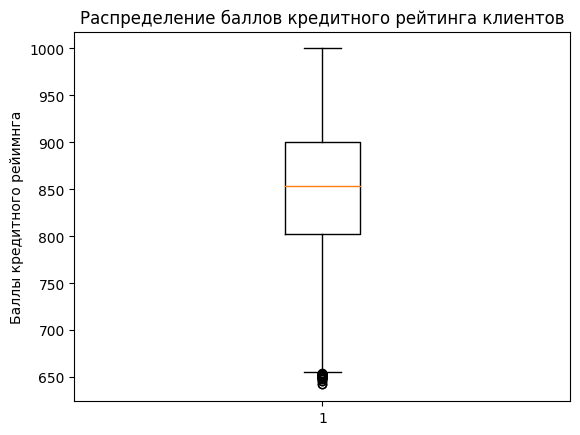

In [18]:
plt.boxplot (data['score'])
plt.title('Распределение баллов кредитного рейтинга клиентов')
plt.ylabel('Баллы кредитного рейимнга')
plt.show ()

В нижней части диаграммы присутствую небольшой хвост с выбросами, но судя по распредению эти значения кредитного рейтинга не являются аномальными. Рейтинг клиентов распределён от значения 642 до 1000.

*Баланс на счёте*

In [19]:
data['balance'].describe()


count    7.705000e+03
mean     8.277943e+05
std      1.980614e+06
min      0.000000e+00
25%      2.955542e+05
50%      5.242722e+05
75%      9.807058e+05
max      1.191136e+08
Name: balance, dtype: float64

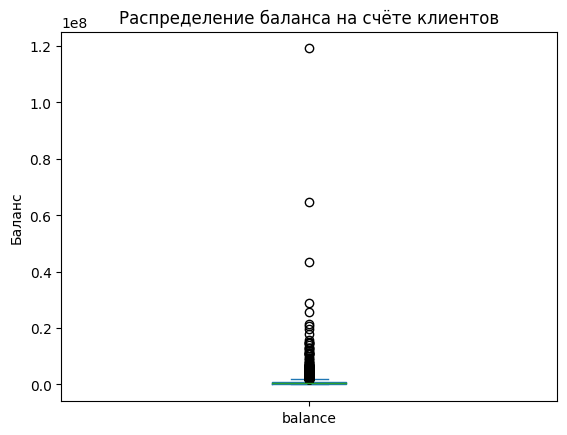

In [20]:
data['balance'].plot(kind='box', subplots=True)
plt.title('Распределение баланса на счёте клиентов')
plt.ylabel('Баланс')
plt.show()

Очистим диаграмму от выбросов.

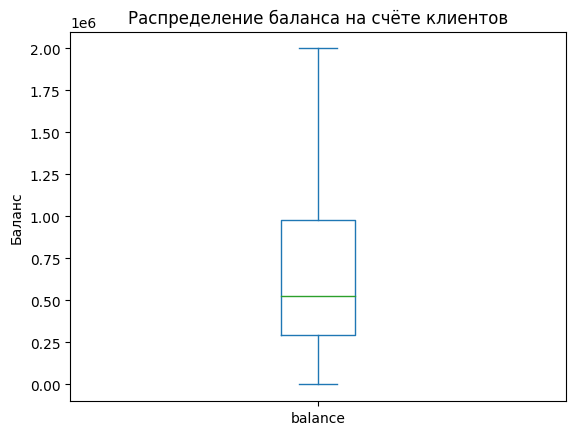

In [21]:
data['balance'].plot(kind='box', subplots=True, showfliers=False)
plt.title('Распределение баланса на счёте клиентов')
plt.ylabel('Баланс')
plt.show()

Разброс баланса на счетах, как и стоило ожидать, очень высок, от 0 до 119 млн. Медиана смещена вниз и составляет около 500 тыс. Выбросами посчитаны все значения выше 2 млн.
Стоит ли действительно считать аномалиями значения баланса более 2 млн? Я думаю что нет, такие суммы вполне реально могут быть размещены на счетах клиетов, поэтому все значения в столбце balance решено оставить без изменения.

*Заработная плата*

In [22]:
data['est_salary'].describe()

count    1.000000e+04
mean     1.478669e+05
std      1.393885e+05
min      2.546300e+03
25%      7.525190e+04
50%      1.196581e+05
75%      1.745005e+05
max      1.395064e+06
Name: est_salary, dtype: float64

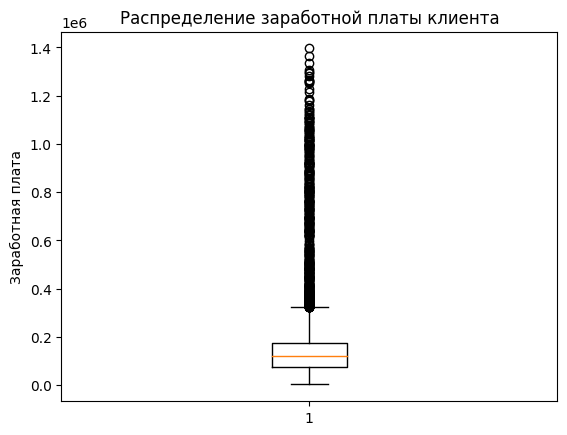

In [23]:
plt.boxplot (data['est_salary'])
plt.title('Распределение заработной платы клиента')
plt.ylabel('Заработная плата')
plt.show ()

Очистим от выбросов

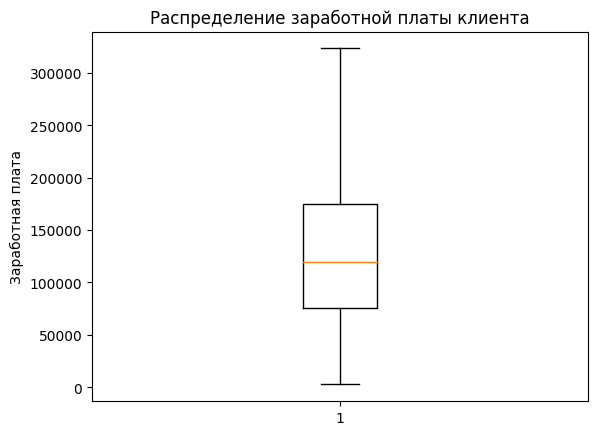

In [24]:
plt.boxplot (data['est_salary'], showfliers=False)
plt.title('Распределение заработной платы клиента')
plt.ylabel('Заработная плата')
plt.show ()

Распределение заработной платы повторяет ситуацию с балансом, так же имеется большой разброс от 2.5 тыс. до 1395 тыс. Медиана смещена к нижним значениям, но не сильно и составляет 119 тысяч.
В данном столбце так же считаю нет оснований считать выбросы аномалиями, поэтому данные останутся в исходном виде.

## **Выводы по разделу**

1. Типы столбцов соответствуют представленным в них данным.
2. Название столбцов приведены к хорошему стилю.
3. Явные дубликаты в данных отсутствуют.
4. Выявленные строки, в результате проверки на не явные дубликаты по значению столбца user_id, оказались оказались не идентичными и оставлены в датафрейме. О задвоении некоторых номеров user_id необходимо сообщить в техническую службу.
5. Пропуски присутствуют в столбцах age и balance. Решено на данном этапе не ставить по ним заглушку и не удалять данные с пропусками.
6. Сильные выбросы зафиксированы в столбцах balance и est_salary, но после анализа значений принято решение не считать их аномалиями, оставить в датафрейме, но при этом зафиксировать их наличие и учитывать это в дальнейшем анализе.

# **Исследовательский анализ данных**

In [25]:
data.head(5)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


## ***Посмотрим на распределение данных в датафрейме по признакам из столбцов.***

In [26]:
# строим диаграмму с сегментами
for column in ['city','gender', 'credit_card','last_activity','churn']:
  dt = pd.DataFrame(data[column].value_counts()).reset_index()
  fig = go.Figure(data=[go.Pie(labels=dt['index'], # указываем значения, которые появятся на метках сегментов
                             values=dt[column], # указываем данные, которые отобразятся на графике
                             pull = [0.1, 0])]) # добfавляем аргумент, который выделит сегмент-лидер на графике
  fig.update_layout(title=f'Распределение клиентов по признаку {column}', # указываем заголовок графика
                  width=800, # указываем размеры графика
                  height=600,
                  annotations=[dict(x=1.12, # вручную настраиваем аннотацию легенды
                                    y=1.05,
                                    text= column,
                                    showarrow=False)])
  fig.show() # выводим график


Из графиков видно следующее распределение по признакам:
1. Большинство клиентов банков в Ярославле (58,9%), на втором месте Рыбинск (29%) и замыкает Ростов (14,2%).
2. По признаку гендер клиенты распределены равномерно, 50% на 50%.
3. Большинство клиентов имеют кредитные карты (68%).
4. Активность в отчётном периоде имеют чуть более половины клиентов (52,3%).
5. Отток клиентов в отчетном периоде составил 18,2%.


In [27]:
df_pr=data.groupby(column).agg(count_users = ('user_id', 'count')).reset_index().sort_values(by='count_users', ascending=False)
df_pr['share_of_total']=(df_pr['count_users']/(df_pr['count_users'].sum())).transform(lambda x: '{:,.2%}'.format(x))
df_pr

,churn,count_users,share_of_total
0,0,8180,81.80%
1,1,1820,18.20%


In [28]:
for column in ['age', 'equity', 'products']:
  df_pr=data.groupby(column).agg(count_users = ('user_id', 'count')).reset_index().sort_values(by='count_users', ascending=False)
  df_pr['share_of_total']=(df_pr['count_users']/(df_pr['count_users'].sum())).transform(lambda x: '{:,.2%}'.format(x))
  # строим столбчатую диаграмму
  fig = px.bar(df_pr.sort_values(by='count_users', ascending=True), # загружаем данные и заново их сортируем
             x=column, # указываем столбец с данными для оси X
             y='count_users', # указываем столбец с данными для оси Y
             text='count_users') # добавляем аргумент, который отобразит текст с информацией
             # о количестве объявлений внутри столбца графика

  # оформляем график
  fig.update_layout(title=f'Распределение клиентов по признаку {column}',
                   xaxis_title = column,
                   yaxis_title='Количество клиентов')
  fig.show() # выводим график

Из графиков видно, что:
1. Возрастной сегмент банка от 18 до 86 лет. При этом больше всего клиентов в возрасте от 32 до 37 лет. До 22 лет люди редко становятся клиентами банка.
2. У 25% клиентов нет ни каких объектов в собствености. На втором месте по количеству разместились клиенты с 5 и 4 объектами в собственности (~ по 19%), а вот клиентов с 6 и более объектами очень мало.
3. Большинство клиентов банка пользуются 2 продуктами (51% - 5126), на втором месте клиенты с 1 продуктом (3341). Клиентов пользующихся сразу 5 продуктами крайне мало, всего 19.

In [29]:
for column in ['score','balance','est_salary']:
  # строим гистограммы
  fig = px.histogram(data, # загружаем данные
                   x=column, # указываем столбец с данными для оси X
                   title=f'Распределение клиентов по признаку {column}', # указываем заголовок
                   nbins=200)# назначаем число корзин
  fig.update_xaxes(title_text=column) # подпись для оси X
  fig.update_yaxes(title_text='Количество клиентов') # подпись для оси Y
  fig.show() # выводим график

#barmode='overlay') # выбираем «полупрозрачный» тип отображения столбцов


В таком виде данные, особенно balance И est_salary тяжело воспринимаются, видны очень большие хвосты с выбросами, которые мы уже находили на этапе предобработки данных. Посмотрим ещё раз эти данные на диаграмме размаха в интерктивном режиме.

In [30]:
for column in ['score','balance','est_salary']:
  fig = go.Figure()
  fig.add_trace(go.Box(y=data[column],
                       name=f'Распределение клиентов по признаку {column}'
                       #boxpoints=False, #убираем выбросы с диаграммы
                       ))
  # установить размеры макета
  fig.update_layout(width=500,
                    height=800
                    )
  fig.show()

Из диаграмм можно сделать следующие выводы:
1.	Балы кредитного скоринга распределены в промежутке от 642 до 1000. При этом значения ниже 655 достаточно редкие. Медианное значение баллов 853.
2.	На диаграммах распределения по признакам balance и est_salary видны очень длинные хвосты выбросов, но мы уже рассматривали их на этапе предобработки дынных и убедились, что эти значения не являются выбросами, а просто достаточно редкими высокие значения, которые вполне вероятны для клиентов банков.
3.	Значения баланса распределено между 0 и 119 млн. При этом медианное значение 524 тысячи, Q1 – 295 тыс, Q3 -0,98 млн.
4.	Значения заработной платы лежат в промежутке между 2,5 тыс и 1,39 млн. Медианное значение 119 тыс, Q1 – 75 тыс,  Q3 – 174 тыс.
Минимальное значение подозрительно не велико, но надо помнить, что не все клиенты банков являются зарплатными клиентами и по не зарплатным клиентам значения в  поле est_salary являются больше предположительными, чем реальными.


## ***Оценим значение корреляции между показателями в датафрейме.***

В наших данных присутствуют не числовые признаки, такие как city и gender, закодируем их, что бы в дальнейшем посмотреть корреляцию для всех признаков.

In [31]:
data_cod = pd.get_dummies (data, columns=['city', 'gender'], drop_first= False)
data_cod.head(10)

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
0,183012,850.0,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,146556,861.0,37.0,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,120722,892.0,30.0,0,NaN,1,1,1,107683.34,0,0,1,0,1,0
3,225363,866.0,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0
4,157978,730.0,34.0,5,174.00,1,1,0,67353.16,1,0,0,1,0,1
5,202305,856.0,56.0,4,863687.24,3,1,0,156619.80,0,0,1,0,0,1
6,177259,807.0,39.0,3,405042.44,3,0,1,103838.32,0,0,0,1,1,0
7,218868,825.0,38.0,4,458145.40,2,1,1,68085.48,0,0,0,1,1,0
8,211686,923.0,54.0,5,1206337.87,2,1,0,155371.79,0,0,0,1,0,1
9,133130,906.0,67.0,0,NaN,1,0,1,238055.53,0,0,0,1,1,0


Теперь можно отследить корреляцию по всем данным таблицы. Построим матрицу корреляции с использованрием тепловой карты, для лучшей визуализации.

<Axes: >

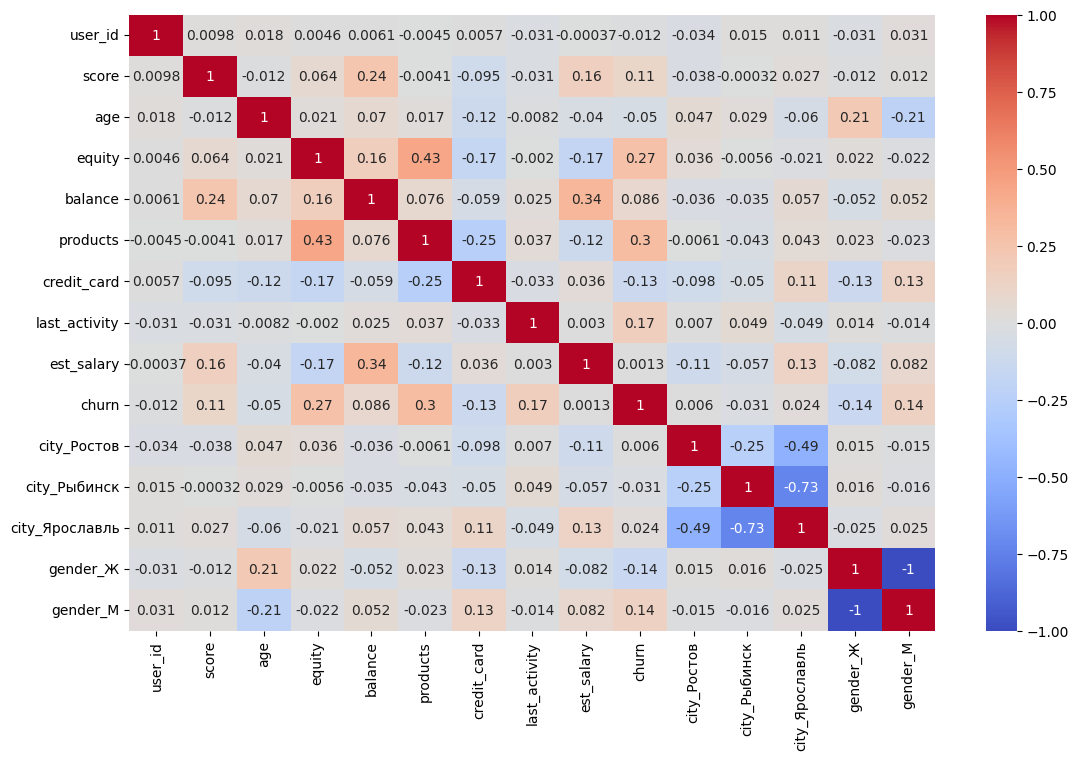

In [32]:
plt.figure(figsize=(13, 8))
sns.heatmap(data_cod.corr(), annot=True, cmap= 'coolwarm')

По матрице видно, что сильной кореляции не имеют ни какие пары признаков из датафрейма. Самое большое значение наблюдается у products и equity (0.43), но всё же оно не достаточно высоко, что бы говорить о какой-то связи между этим показателями.

## **Выводы по разделу**

1.	Большинство клиентов банков в Ярославле (58,9%), на втором месте Рыбинск (29%) и замыкает Ростов (14,2%).
2.	По признаку гендер клиенты распределены равномерно, 50% на 50%.
3.	Большинство клиентов имеют кредитные карты (68%).
4.	Активность в отчётном периоде имеют чуть более половины клиентов (52,3%).
5.	Отток клиентов в отчетном периоде составил 18,2%.
6.	Возрастной сегмент банка от 18 до 86 лет. При этом больше всего клиентов в возрасте от 32 до 37 лет. До 22 лет люди редко становятся клиентами банка.
7.	У 25% клиентов нет никаких объектов в собственности. На втором месте по количеству разместились клиенты с 5 и 4 объектами в собственности (~ по 19%), а вот клиентов с 6 и более объектами очень мало.
8.	Большинство клиентов банка пользуются 2 продуктами (51% - 5126), на втором месте клиенты с 1 продуктом (3341). Клиентов, пользующихся сразу 5 продуктами, крайне мало, всего 19.
9.	Балы кредитного скоринга распределены в промежутке от 642 до 1000. При этом значения ниже 655 достаточно редкие. Медианное значение баллов 853.
10.	 Значения баланса распределено между 0 и 119 млн. При этом медианное значение 524 тысячи, Q1 – 295 тыс, Q3 -0,98 млн.
11.	 Значения баланса распределено между 0 и 119 млн. При этом медианное значение 524 тысячи, Q1 – 295 тыс, Q3 -0,98 млн.
12.	 Значения заработной платы лежат в промежутке между 2,5 тыс и 1,39 млн. Медианное значение 119 тыс, Q1 – 75 тыс, Q3 – 174 тыс. Минимальное значение подозрительно не велико, но надо помнить, что не все клиенты банков являются зарплатными клиентами и по не зарплатным клиентам значения в поле est_salary являются больше предположительными, чем реальными.
13.	Сильной корреляции не имеют никакие пары признаков из датафрейма. Самое большое значение наблюдается у products и equity (0.43), но всё же оно недостаточно высоко, чтобы говорить о какой-то связи между этим показателями.


# **Сегментация**

## ***Cегментация клиентов в разрезе числа используемых продуктов и других признаков.***

In [33]:
#data.head(5)

Для начала рассчитаем процент оттока от общего числа клиентов

In [34]:
print('Доля отточных клиентов:', data['churn'].sum()/data['user_id'].count())


Доля отточных клиентов: 0.182


Сгруппируем данные для расчета распределения клиентов по количеству используемых продуктов и оттока клиентов в этих группах.

In [35]:
products_segm = data.groupby('products').agg(
    users = ('user_id', 'count'),
    churn_users = ('churn', 'sum'),
    share_churn = ('churn', 'mean'),
    share_users = ('user_id', 'mean')
    ).reset_index().sort_values(by='users', ascending=False)

products_segm['share_churn'] = products_segm['share_churn'].round(2)
products_segm['share_users'] = (products_segm['users']/products_segm['users'].sum()).round(2)
products_segm

,products,users,churn_users,share_churn,share_users
2,2,5126,979,0.19,0.51
1,1,3341,235,0.07,0.33
3,3,1039,297,0.29,0.10
4,4,474,300,0.63,0.05
5,5,19,8,0.42,0.00
0,0,1,1,1.00,0.00


Из данных видно, что большинтсво клиентов (51%) используют 2 продукта. Далее идут клиенты использующие 1 (33%) и 3 (10%) продукта. Клиетов с количеством продуктов более 4х очень мало.

Так же заметно, что процент оттока клиентов с 2 продуктами практически совпадет с медианным оттоком по всем клиентам банка, а вот отток клиентов использующих 4 продукта сильно превышает медианное значение по банку и составляет 63%. Так же по оттоку обращают на себя внимание клиенты с 1 продуктом, их отток напротив сильно ниже медианного (7%) и клиенты с 3 продуктами с оттоком 29%.
Отток по клиентам с 5 продуктами так же очень высок (42%), но сам объем клиентов с таким количеством продуктом слишком мал и анализ на таких объемах может дать не корректые результаты.

Рассмотрим выделяющиеся группы с 4, 3 продуктами в более глубокой сегментации, а так же всё же обратим внимние и на группу с 2 продуктами, хоть отток по ней и примерно равен медианному значению, но она достоточно многочислена и может удасться выделит внутри нее дополнительнуй сегмент, с которым можно будет поработать над уменьшением оттока, тем более по клиентам с 1 продутом видно, что отток может быть гараздо меньше.

***Сегмент потребляющий 4 продукта.***

In [36]:
products_4 = data.query('products == 4')
products_4.head(5)


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
76,213688,922.0,Ярославль,Ж,37.0,5,1214707.38,4,0,1,85121.07,0
81,223978,850.0,Рыбинск,М,34.0,5,351583.16,4,0,1,115354.97,1
94,191870,821.0,Ростов,Ж,30.0,3,157677.78,4,0,1,36397.02,0
103,128618,841.0,Ростов,М,29.0,1,175505.11,4,1,1,48188.69,0
148,122769,868.0,Ростов,Ж,58.0,5,1334745.59,4,0,1,63049.60,1


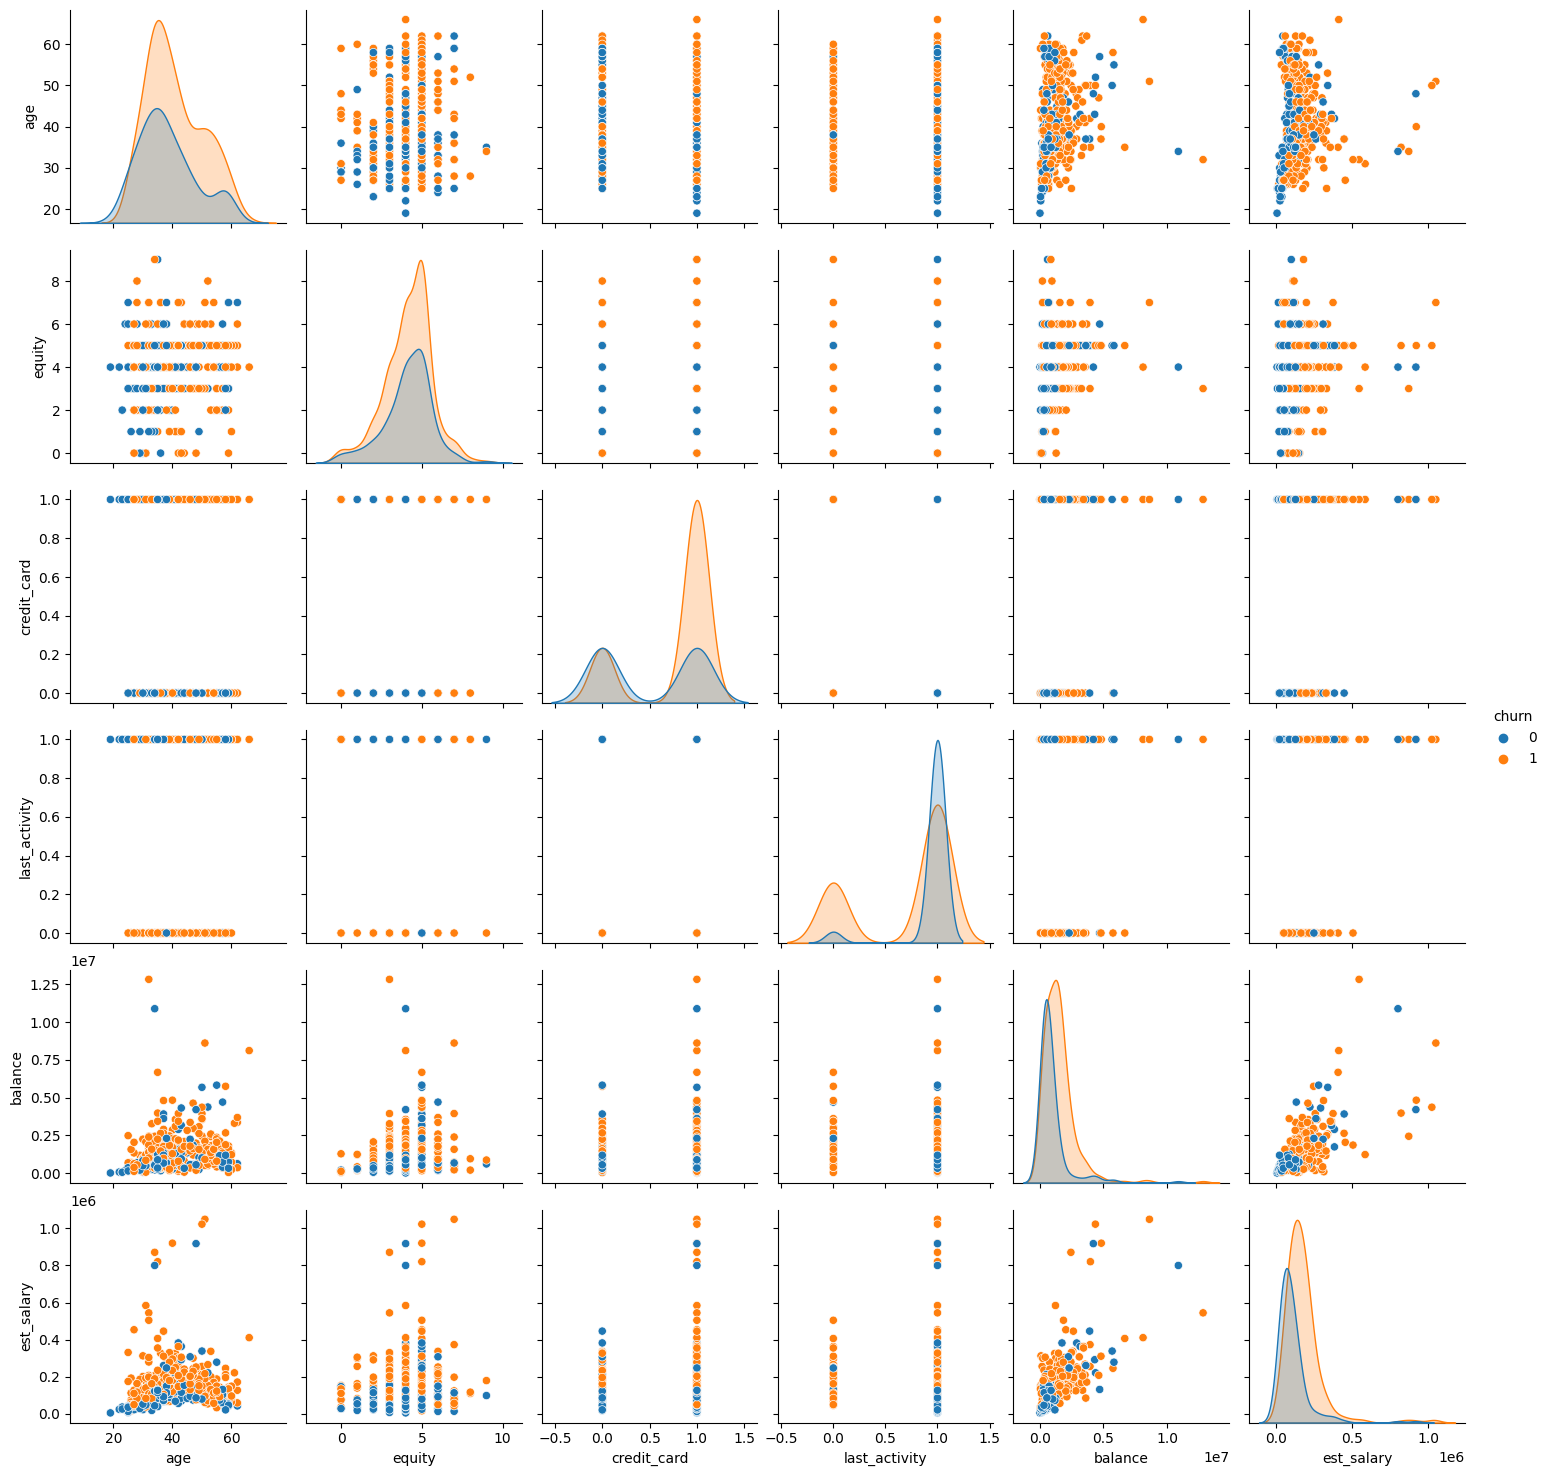

In [37]:
sns.pairplot(products_4[[ 'age', 'equity', 'credit_card',	'last_activity', 'balance','est_salary', 'churn']], hue='churn')

В группе с клиентами потребляющими 4 продукта чаще уходили в отток следующие клиенты:
1. Не активные в отчетном периоде клиенты, вне зависимости от возраста, заработной платы, баланса, наличию кредитной карты и объектов в собственности.
2. Активные клиенты с балансом 200000 - 4000000 и зп 150000 - 350000
2. Клиенты с 40 лет имеющие кредитные карты.
3. Клиенты с более 5 объектами в собственности.

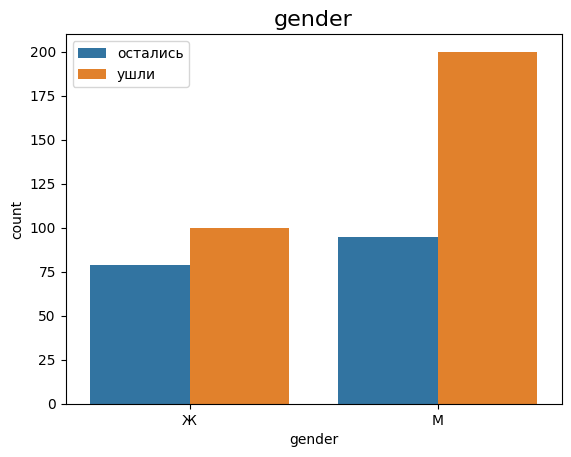

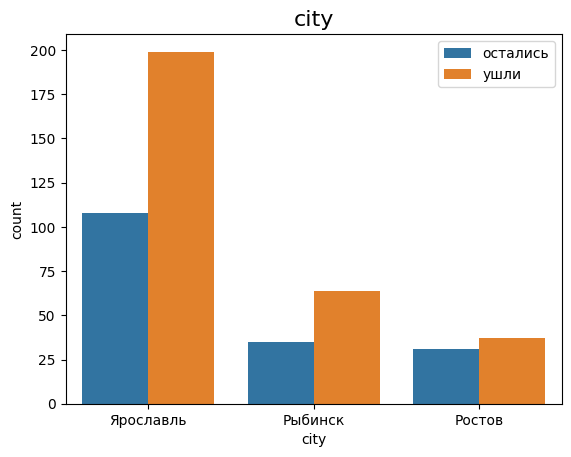

In [38]:
for column in ['gender','city']:
        ax = sns.countplot(data=products_4, x= column, hue='churn');
        plt.title(column, fontsize = 16)
        plt.legend(['остались', 'ушли'])
        plt.show()

Из диаграмм видно, что клиенты мужчины чаще всего уходят, их в 2 раза больше, чем тех, кто остается. Так же особенно видны проблемы с оттоком в Ярославле и Рыбинске, в них так количество уходящих примерно в 2 раз превышает коичество остающихся.
Сегмент с 4-мя потребляемыми продуктами достаточно малочислен всего 474 клиента. Дробить его ещё дополнительно не имеет смысла.

***Сегмент потребляющий 2 продукта.***

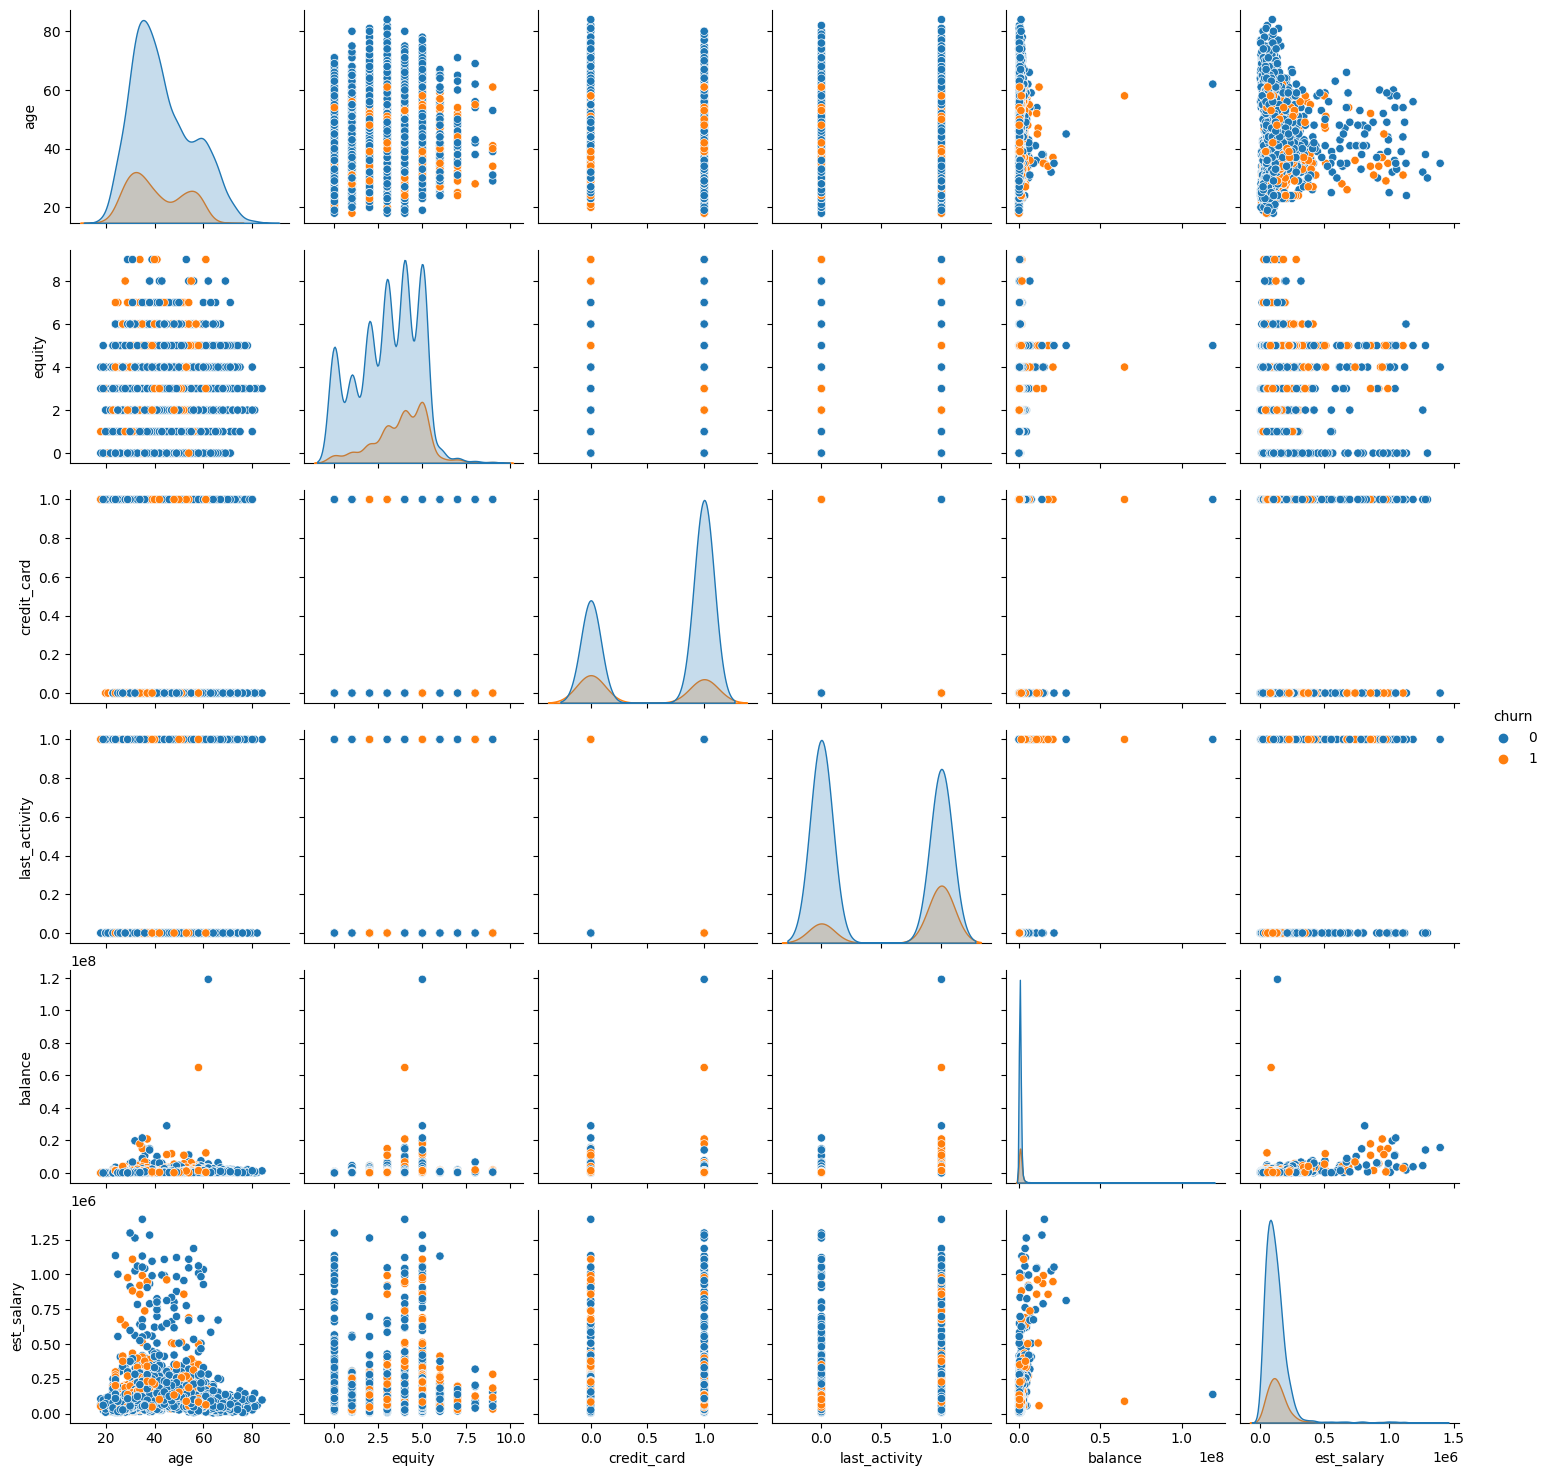

In [39]:
products_2 = data.query('products == 2')
sns.pairplot(products_2[[ 'age', 'equity', 'credit_card',	'last_activity', 'balance','est_salary', 'churn']], hue='churn')

В группе с клиентами потребляющими 2 продукта чаще уходили в отток следующие клиенты:

1. Активные клиенты с балансом от 0 до 20000000.

2. Имеющие кредитные карты в возрасте 35-45 лет

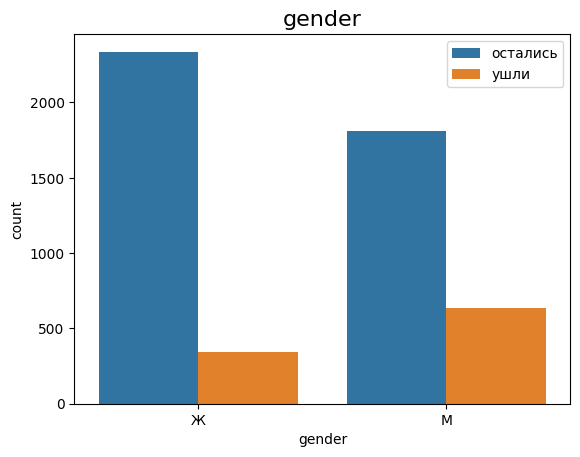

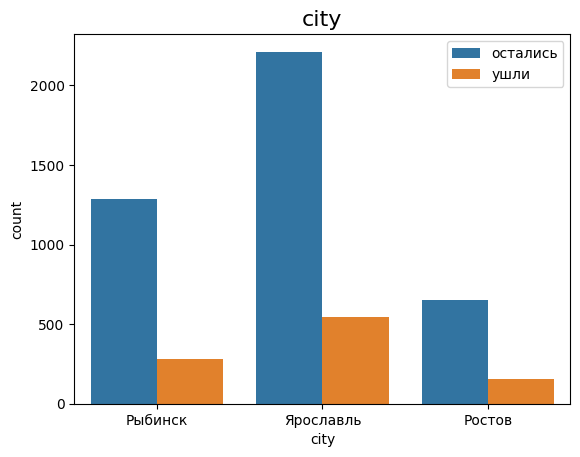

In [40]:
for column in ['gender','city']:
        ax = sns.countplot(data=products_2, x= column, hue='churn');
        plt.title(column, fontsize = 16)
        plt.legend(['остались', 'ушли'])
        plt.show()

По гендерному признаку чаще в отток уходят клиенты мужчины, а вот при распределии по городам нет сильных различий в проценте оттока от общего числа клиентов.

Сегмент с 2 потребляемыми продуктами достаточно велик, решено выделить в нём дополнительные сегменты по признаку активности.

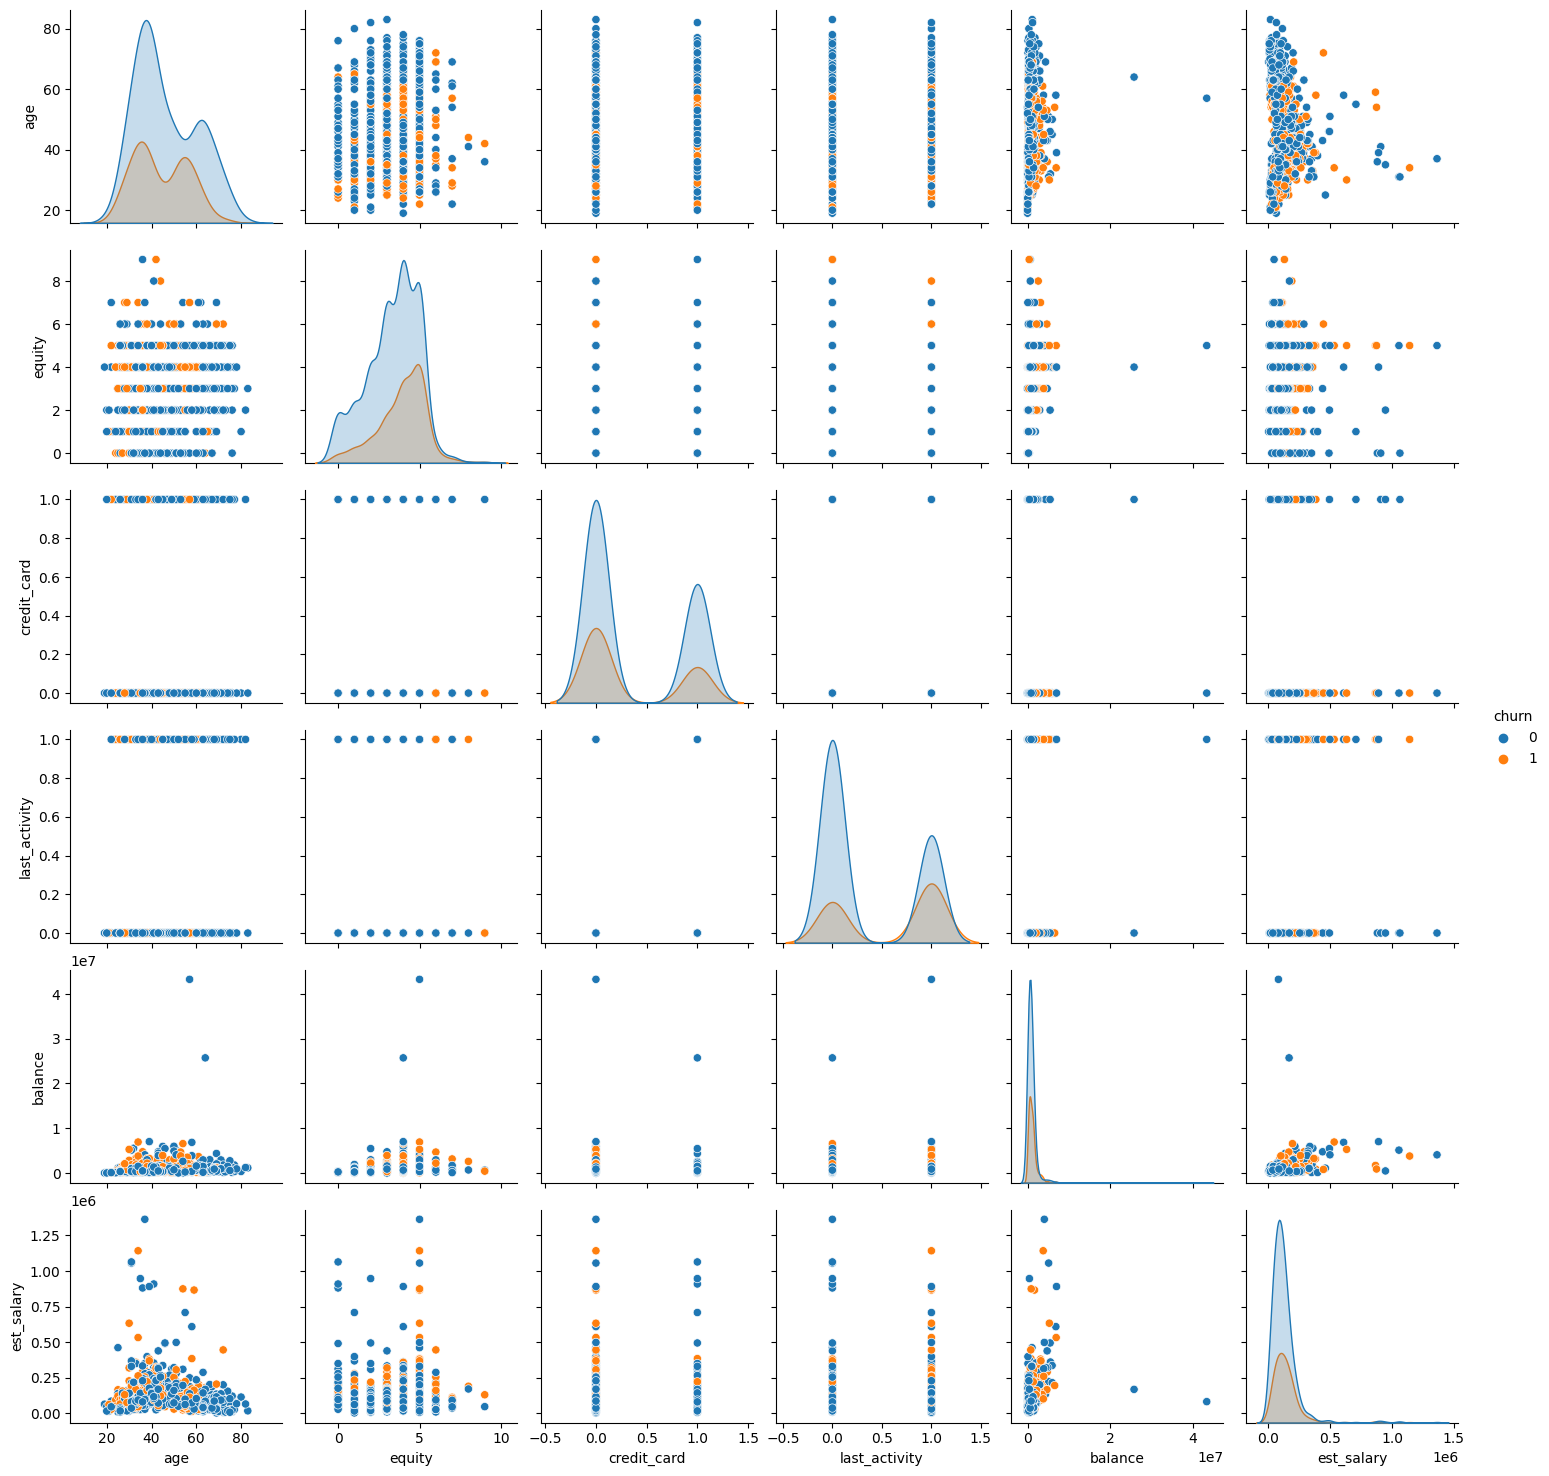

In [41]:
products_3 = data.query('products == 3')
sns.pairplot(products_3[[ 'age', 'equity', 'credit_card',	'last_activity', 'balance','est_salary', 'churn']], hue='churn')

В группе с клиентами потребляющими 3 продукта чаще уходили в отток следующие клиенты:
1. Активные клиенты с балансом 3000000-7000000
2. Клиенты с зп 300000-500000 не имеющие кредитной карты.

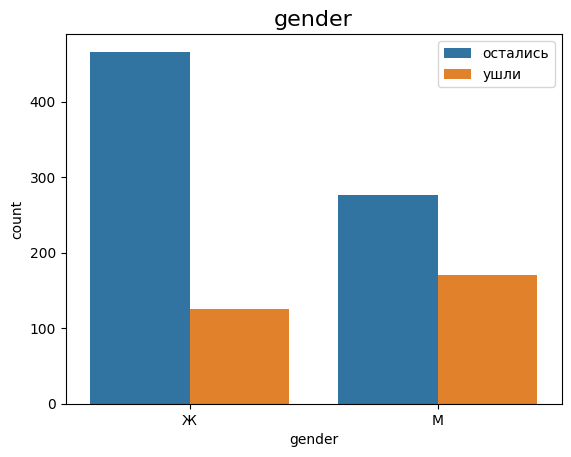

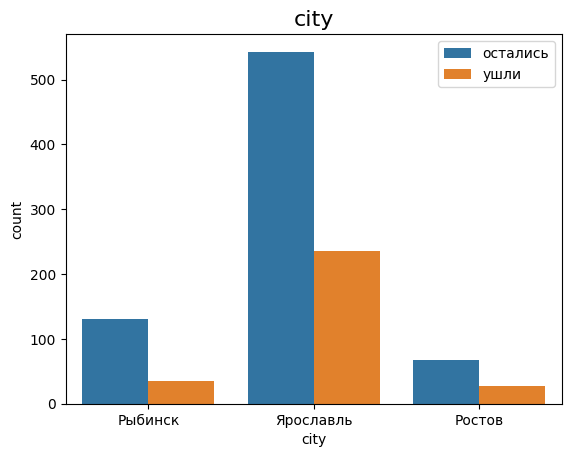

In [42]:
for column in ['gender','city']:
        ax = sns.countplot(data=products_3, x= column, hue='churn');
        plt.title(column, fontsize = 16)
        plt.legend(['остались', 'ушли'])
        plt.show()

По гендерному признаку чаще в отток уходят клиенты мужчины, а вот при распределии по городам нет сильных различий в проценте оттока от общего числа клиентов.

Сегмент с 3 потребляемыми продуктами не так уж сильно велик, внутри него тоже решено не выделять дополнительный сегмент.

Присвоим новые категории немного изменив сигментацию от изначальной.

In [43]:
data.loc[(data['products'] == 1), 'category'] = 'c_1'
data.loc[(data['products'] == 2) &  (data['last_activity'] == 1), 'category'] = 'c_2_1'
data.loc[(data['products'] == 2) &  (data['last_activity'] == 0), 'category'] = 'с_2_2'
data.loc[(data['products'] == 3), 'category'] = 'c_3'
data.loc[(data['products'] == 4), 'category'] = 'с_4'
data.loc[(data['products'] == 5), 'category'] = 'c_5'
data.loc[(data['products'] == 0), 'category'] = 'c_0'


Сгруппируем данные для расчета распределения клиентов по новым категориям и оттока клиентов в этих группах.

In [44]:
products_segm_new= data.groupby('category').agg(
    users = ('user_id', 'count'),
    churn_users = ('churn', 'sum'),
    share_churn = ('churn', 'mean'),
    share_users = ('user_id', 'mean')
    ).reset_index().sort_values(by='users', ascending=False)

products_segm_new['share_churn'] = products_segm_new['share_churn'].round(2)
products_segm_new['share_users'] = (products_segm_new['users']/products_segm_new['users'].sum()).round(2)
products_segm_new

,category,users,churn_users,share_churn,share_users
1,c_1,3341,235,0.07,0.33
2,c_2_1,2646,732,0.28,0.26
5,с_2_2,2480,247,0.10,0.25
3,c_3,1039,297,0.29,0.10
6,с_4,474,300,0.63,0.05
4,c_5,19,8,0.42,0.00
0,c_0,1,1,1.00,0.00


Сегменты с_0 и с_5 слишком малочисленны, решено не включать их в конечную сегментацию.

## ***Рассмотрим распределение признаков по получившимся сегментам для опредления портрета клиента каждого сегмента.***

In [45]:
#data.head(5)

Построим диграммы размаха для данных из столбцов score, age, balance и est_salary и сразу очистим отображаемые данные от выбросов.

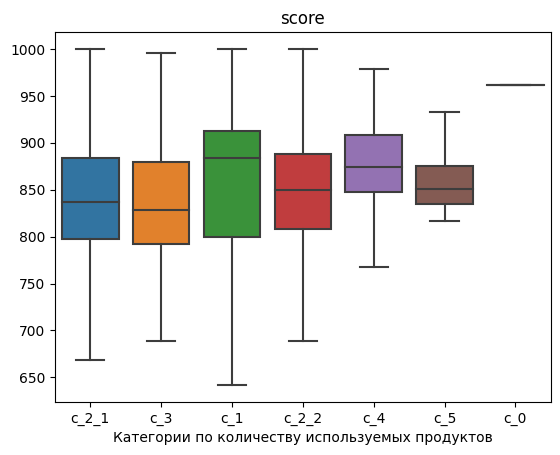

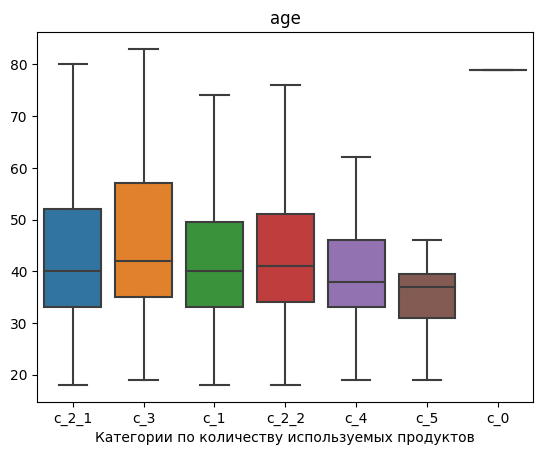

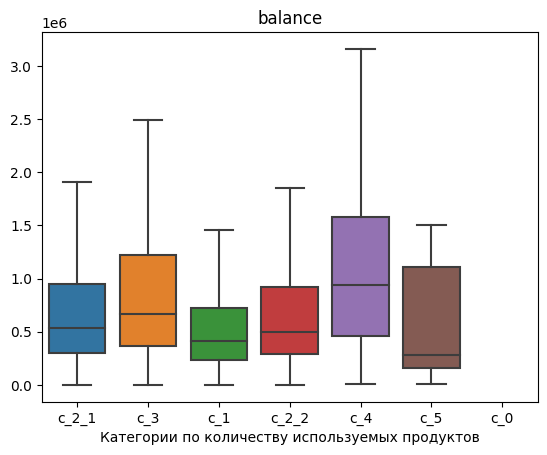

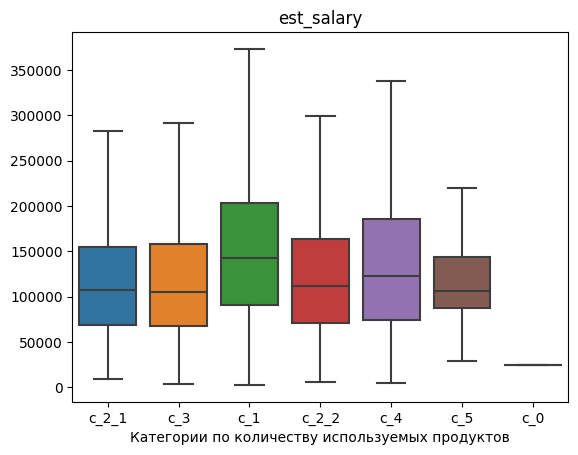

In [46]:
for column in ['score','age','balance','est_salary']:
    plt.figure()
    sns.boxplot(data=data, y = column, x = 'category', showfliers=False)
    plt.xlabel('Категории по количеству используемых продуктов')
    plt.ylabel('')
    plt.title(column)
    plt.show();

Постоим диаграммы распределения по оставшимся признакам.

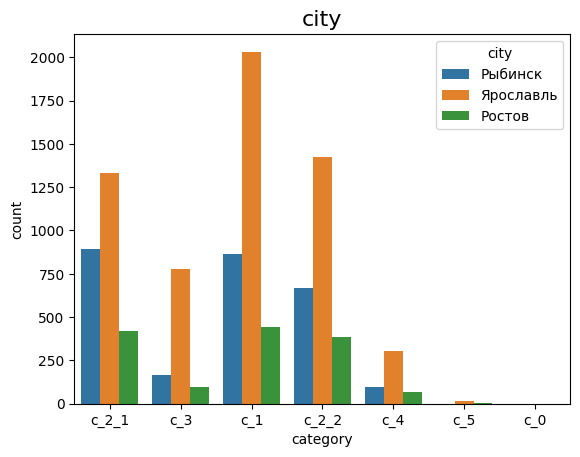

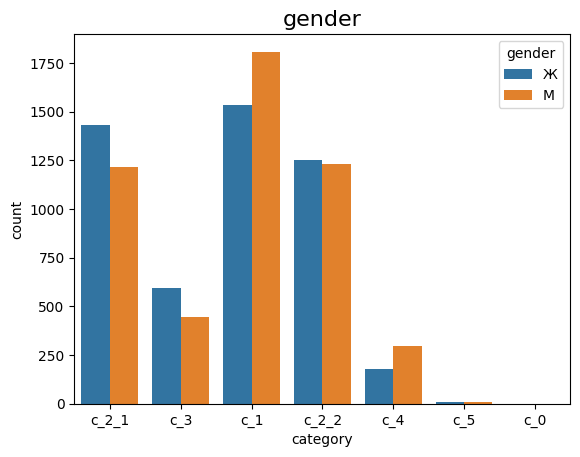

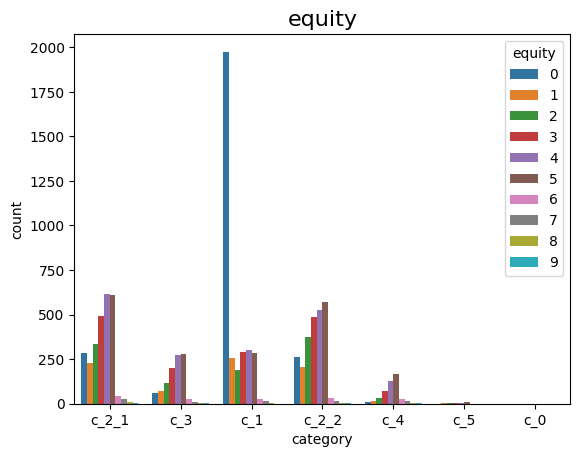

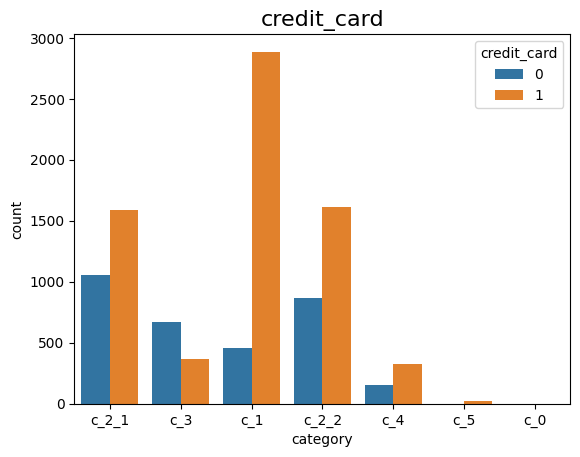

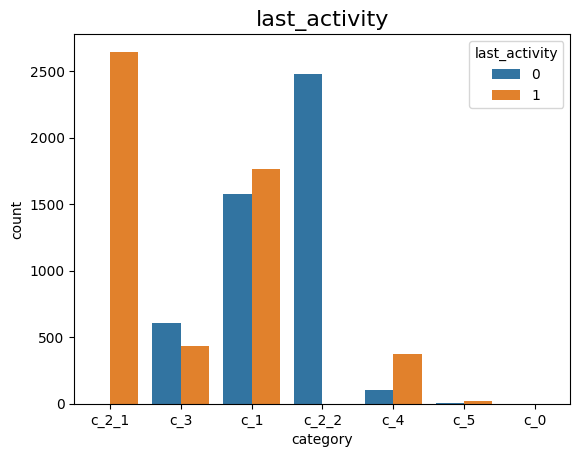

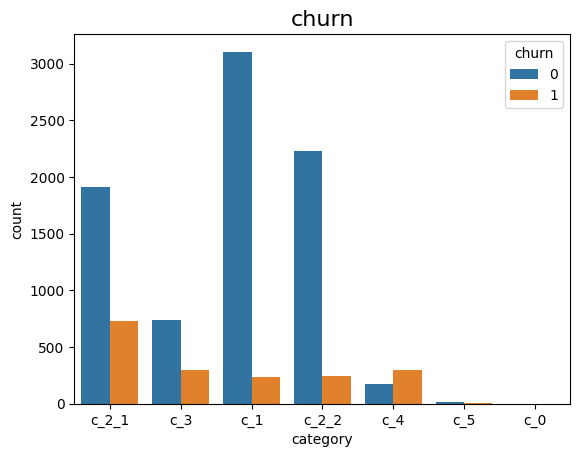

In [47]:
for column in ['city',	'gender',	'equity',	'credit_card',	'last_activity',	'churn'	]:
        ax = sns.countplot(data=data, x= 'category', hue=column);
        plt.title(column, fontsize = 16)
        plt.show()


## **Выводы по разделу**

По результатам проделанной работы у нас выделись следующие сегменты:

1. Клиенты с 1 потребляемым продуктом. Самый многочисленный сегмент (33% от общего числа клиентов), при этом с самым низким процентом оттока, всего 7%.  Медианное значение кредитного рейтинга выше, чем у других сегментов (~880 единиц). Возрастной диапазон клиентов в данном сегменте от 18 до 75, медианное значение  не сильно отличается от других сегментов и составляет около 40 лет. Баланс на счетах клиентов самый низкий среди всех сегментов и лежит в диапазоне от 0 до 1500000, медианное значение около 400000, при этом медианное значение заработной платы выше чем остальных сегментах (Q1 ~ 100000, Q2 ~ 150000, Q3 ~ 200000). По гендерному признаку преобладают клиенты мужского пола. Так же у 2/3 клиентов отсутствуют какие либо объекты в собственности. Почти все клиенты данного сегмента имеют кредитные карты.


2. Активные клиенты с 2 потребляемым продуктом. Второй по многочисленности сегмент (26% от общего числа клиентов), при этом с высоким процентом оттока 28%.  Медианное значение кредитного рейтинга одно из самых низких среди сегментов и  составляет около 830 единиц. Возрастной диапазон клиентов в данном сегменте от 18 до 80, медианное значение  не сильно отличается от других сегментов и составляет около 40 лет. Баланс на счетах клиентов лежит в диапазоне от 0 до 1900000, медианное значение около 500000. Медианное значение заработной платы среднее по сегментам (Q1 ~ 75000, Q2 ~ 110000, Q3 ~ 150000). По гендерному признаку не сильно, но всё же преобладают клиенты женского пола. Так же у многих клиентов есть до 5 объектов в собственности. Клиенты с кредитными картами немного преобладают над клиентами без них.

3. Не активные клиенты с 2 потребляемым продуктом. Третий по многочисленности сегмент (25% от общего числа клиентов), с низким оттока 10%.  Медианное значение кредитного рейтинга самое низкое среди сегментов и  составляет около 825 единиц. Возрастной диапазон клиентов в данном сегменте от 18 до 75, медианное значение  не сильно отличается от других сегментов и составляет около 40 лет. Баланс на счетах клиентов лежит в диапазоне от 0 до 1800000, медианное значение около 500000. Медианное значение заработной платы среднее по сегментам, (Q1 ~ 75000, Q2 ~ 120000, Q3 ~ 160000). По гендерному признаку нет особых различий в распределении клиентов. Так же у многих клиентов есть до 5 объектов в собственности. Клиенты с кредитными картами  преобладают над клиентами без них.

4. Клиенты с 3 потребляемым продуктом. Не многочисленный сегмент (10% от общего числа клиентов), при этом с высоким процентом оттока, всего 29%.  Медианное значение кредитного рейтинга выше, чем у других сегментов (~880 единиц). Возрастной диапазон клиентов в данном сегменте от 18 до 75, медианное значение  не сильно отличается от других сегментов и составляет около 42 лет. Баланс на счетах клиентов лежит в диапазоне от 0 до 2500000, медианное значение около 750000. Медианное значение заработной платы среднее по сегментам, (Q1 ~ 75000, Q2 ~ 110000, Q3 ~ 150000).По гендерному признаку не значительно преобладают клиенты женского пола. Так же у многих клиентов есть до 5 объектов в собственности. 1/3 от всех клиентов сегмента имеет кредитные карты.

5. Клиенты с 4 потребляемым продуктом. Не многочисленный сегмент (5% от общего числа клиентов), при этом с самым высоким процентом оттока 63%.  Клиенты данного сегмента  не имеют значений кредитного рейтинга ниже 775, медианное значение одно из самых высоких  (~870 единиц). Возрастной диапазон клиентов в данном сегменте от 19 до 62, медианное значение  не сильно отличается от других сегментов и составляет около 40 лет. Баланс на счетах клиентов самый высокий среди всех сегментов и лежит в диапазоне от 0 до 3200000, медианное значение около 1000000, при этом значения заработной платы выделяются не сильно (Q1 ~ 75000, Q2 ~ 125000, Q3 ~ 175000). По гендерному признаку преобладают клиенты мужского пола. Так же у многих клиентов есть до 5 объектов в собственности. 2/3 клиентов данного сегмента имеют кредитные карты.


# **Статистическая проверка гипотез**

1. Проверим гипотезу различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

Мы имеем две независящие друг от друга выборки разного размера. В этом случае для проверки гипотезы будем использовать метод st.ttest_ind. Так как наши выборки имеют разный размер и есть сомнение, что дисперсии у них одинаковые, то укажем False в качестве параметра equal_var.


Сформулируем нулевую и альтернативную гипотезы:

H₀: Средний возраст клиентов пользующихся 2 и 1 продуктом одинаковые

H₁: Средний возраст клиентов пользующихся 2 и 1 продуктом различаются

In [48]:
product_2 = data.query('products == 2')
product_1 = data.query('products == 1')
print ('Средний возраст клиентов пользующихся 2 продуктами:' , product_2['age'].mean())
print ('Средний возраст клиентов пользующихся 1 продуктом:' , product_1['age'].mean())

Средний возраст клиентов пользующихся 2 продуктами: 42.76890017581559
Средний возраст клиентов пользующихся 1 продуктом: 42.19620824556124


In [49]:
alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(product_2['age'],  product_1['age'], equal_var=False, nan_policy='omit')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.03299080704232691
Отвергаем нулевую гипотезу


Значение p-value показывает: вероятность случайно получить такое или большее различие 3%. Это очень маленькая веротность, что бы делать вывод о равенстве среднего возраста клиентов пользующихся 2 и 1 продуктами.

2. В результате работы мы разбили группу пользующуюся 2 продуктами на две (с_2_1 и с_2_2) по признаку активности клиентов в отчетном периоде. Теперь проверим гипотезу различия долей женщин в получившися группах.

Сформулируем нулевую и альтернативную гипотезы:

H₀: Различий долей женщин в группах c_2_1 и c_2_2 нет.

H₁: Между долями есть значимая разница

Для проведения дальнейшего анализа создадим сводную таблицу с необходимыми столбцами.

In [50]:
data_for_test = data.pivot_table(index='gender', columns='category', values='user_id', aggfunc='count').reset_index()
data_for_test['2_1_all'] = data_for_test['c_2_1'].sum()
data_for_test['2_2_all'] = data_for_test['с_2_2'].sum()
data_for_test = data_for_test[['gender', 'c_2_1', 'с_2_2', '2_1_all', '2_2_all']]
data_for_test

category,gender,c_2_1,с_2_2,2_1_all,2_2_all
0,Ж,1431.0,1249.0,2646.0,2480.0
1,М,1215.0,1231.0,2646.0,2480.0


In [51]:
from statsmodels.stats.proportion import proportions_ztest
count = np.array([data_for_test.loc[0,'c_2_1'], data_for_test.loc[0,'с_2_2']])
nobs = np.array([data_for_test.loc[0,'2_1_all'], data_for_test.loc[0,'2_2_all']])
alpha = 0.05  # критический уровень статистической значимости
stat, p_value = proportions_ztest(count, nobs)

print('p_value: ', '{0:0.3f}'.format(p_value))

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    )


p_value:  0.008
Отвергаем нулевую гипотезу: между долями есть значимая разница


Согласно проведенном тесту, различие между долями женщин в группах с_2_1 и с_2_2 статистически значимо.

# **Итоговый вывод**

Была проделана работа по анализу клиентов регионального банка «Метанпромбанк».
Пользователи просегментированы по количеству потребляемых продуктов, выделено 5 сегментов.
    
В результате проверки гипотез удалось выяснить:
- средний возраст клиентов пользующихся 2 и 1 продуктом различаются
- между долями клиентов жещин в группах  пользующихся 2 продуктами, но разделенных по активности, есть значимая разница.

Рекомендации:
- клиентам с 1 продуктом: предлагать дополнительные продукты, у данных клиентов зафиксировано самое высокие значение медианной заработной платы, при этом  баланс на счетах самый низкий, вероятнее всего для данных клиентов будут интересны вклады и какие-то инвестиционные продукты. Также в данном сегменте у многих  клиентов зафиксировано отсутствие каких-либо объектов в собственности. С учетом высокого уровня заработной платы в данном сегменте, клиентам так же могут быть интересны ипотечные продукты и кредиты, например на покупку автомобиля.
- активных клиентам с 2 продуктами: из анализа было видно, что в данном сегменте был отток почти всех клиентов, имеющих деньги на балансе. Существует вероятность, что в отчетном периоде были изменены условия по продуктам касающийся накоплению денежных средств, например вкладах или накопительных счетах. Нужно пересмотреть условия по данным продуктам и конкурентные ставки и предложить данный продукт клиенту повторно на более выгодных условиях.
- не активным клиентам с 2 продуктами: у этих клиентов зафиксирован достаточно низкий отток и нет какой сильно выделяющейся отличительной особенности. Для них рекомендовано просто предлагать дополнительные продукты, которыми до настоящего момента ещё не пользовался клиент.
для
- клиентам с 3 продуктами: у этом сегменте наблюдается высокий процент оттока, 29%.  Чаше всего уходят активные клиенты с балансом 3000000-7000000 и клиенты с зп 300000-500000 не имеющие кредитной карты. С учетом активности и высоких размеров денежных средств на балансе, как и активным клиентам с 2 продуктами надо попробовать пересмотреть условия по продуктам касающихся накопления денежных средстви, изучить конкурентные ставки и предложить данный продукт клиенту повторно на более выгодных условиях. Так же в данном сегменте мало клиентов имеют кредитные карты, данный продукт тоже можно предложить к рассмотрению.
- клиенты с 4 продуктами: в этом сегменте наблюдается самый высокий процент оттока, 63%. При этом хоть сегмент и малочисленный, но это самый "молодой" и имеющий самые большие значения баланса на счетах. Так же отток сильно бросаетя в глаза именно в Ярославле и Рыбинске. Чаще всего такой сегмент ищет более прибылный для себя условия, возможно стоит рассмотреть специальные пакеты услуг для клиентов использующих 4 и более продукта банка, с дополнительными бонусами, такими как повышенный процент по вкладам, повышенный кэшбэк по картам и т.п для сохранения их капитала внутри банка, а так же выделить премиум менеджера для общения с такими клиентами.



